In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import xarray as xr
from pprint import pprint

from FSSLibrary import FFTBasic as fft
import skyboxdatapy as skb

## Load the case

In [2]:
data_folder = "/home/shagun/Acads/SkyBox/ExpData/data_nosync"
testName = "Test562"

file = skb.io.find_unique_file(data_folder, testName, ext="mat")
print(f"Processing file: {file}")

# loaded_mat = skb.io.load_hdf5_mat(file)
loaded_mat = skb.io.load_case(file)

Processing file: /home/shagun/Acads/SkyBox/ExpData/data_nosync/d1030/Measure_MAT/Test562_PLT741_d50_FC52_H127_FCL0960_R03.mat

=== Reading MAT ===
Top-level keys: ['ConversionFactor', 'ConversionOffset', 'DefaultData', 'MP3Filtered', 'MP3RawValue', 'MP3Voltage', 'TestProperties']
=== Successfully loaded using hdf5storage ===



## Test Properties

In [3]:
skb.utils.print_test_properties(loaded_mat)


=== Test Properties ===
   - testName: Test562
   - testType: PLT741
   - repeatType: R3
   - useTest: nan
   - fSampling: 2000.0
   - calibrationFile: Test_d1030_Calib
   - depthAtWM: 0.505
   - depthAtMPL: 0.472
   - airGapAtMPL: 0.269
   - waveType: FC52
   - waveAmplitude: 0.127
   - wavePeriod: nan
   - focusingLocation: 9.6
   - remarks: GP1, GP2, GP3, Shagun, LIGHT
=== End of Test Properties ===



## List all headers in the dict

In [4]:
skb.utils.print_all_headers(loaded_mat)            


=== Listing headers ===
Top-level keys: ['ConversionFactor', 'ConversionOffset', 'DefaultData', 'MP3Filtered', 'MP3RawValue', 'MP3Voltage', 'TestProperties']

Top-level: ConversionFactor -> type: <class 'dict'>
   - WG01
   - WG02
   - WG03
   - WG04
   - WG05
   - WG06
   - WG07
   - WG08
   - WG09
   - WM
   - PS01
   - PS02
   - PS04
   - PS13
   - PS14
   - PS15
   - PS16
   - PS17
   - PS18
   - PS19
   - PS20
   - PS21
   - PS03
   - PS05
   - PS06
   - PS07
   - PS08
   - PS09
   - PS10
   - PS11
   - PS12
   - PS22
   - PS23
   - PS24
   - Mo01
   - Mo02
   - Mo03
   - Mo04
   - Mo05
   - Mo06
   - Mo07
   - Mo08
   - L1
   - L2
   - L3
-----

Top-level: ConversionOffset -> type: <class 'dict'>
   - WG01
   - WG02
   - WG03
   - WG04
   - WG05
   - WG06
   - WG07
   - WG08
   - WG09
   - WM
   - PS01
   - PS02
   - PS04
   - PS13
   - PS14
   - PS15
   - PS16
   - PS17
   - PS18
   - PS19
   - PS20
   - PS21
   - PS03
   - PS05
   - PS06
   - PS07
   - PS08
   - PS09
   - PS10

## Extract Default Dataset

In [5]:
ds = loaded_mat["DefaultData"]

skb.utils.print_top_headers(ds)


=== Listing headers ===
Object type: <class 'xarray.core.dataset.Dataset'>
KeysView(<xarray.Dataset> Size: 86MB
Dimensions:      (Time: 228620)
Coordinates:
  * Time         (Time) float64 2MB 0.0 0.06034 0.06084 ... 114.4 114.4 114.4
Data variables: (12/46)
    WG01         (Time) float64 2MB -96.02 -95.83 -95.82 ... -98.92 -98.89
    WG02         (Time) float64 2MB -96.77 -96.66 -97.09 ... -93.82 -93.84
    WG03         (Time) float64 2MB -97.19 -97.31 -97.27 ... -105.6 -105.7
    WG04         (Time) float64 2MB -99.95 -100.1 -100.1 ... -108.3 -108.3
    WG05         (Time) float64 2MB 6.004e+04 6.004e+04 -101.1 ... -109.3 -109.3
    WG06         (Time) float64 2MB -269.9 -269.9 -269.9 ... -269.9 -269.9
    ...           ...
    Mo07         (Time) float64 2MB 155.8 155.8 155.9 ... 157.5 157.5 157.5
    Mo08         (Time) float64 2MB -739.0 -739.0 -738.9 ... -738.3 -738.4
    L1           (Time) float64 2MB -0.3569 -0.3569 -0.3844 ... -0.4118 -0.3981
    L2           (Time) float64

## Plot signals

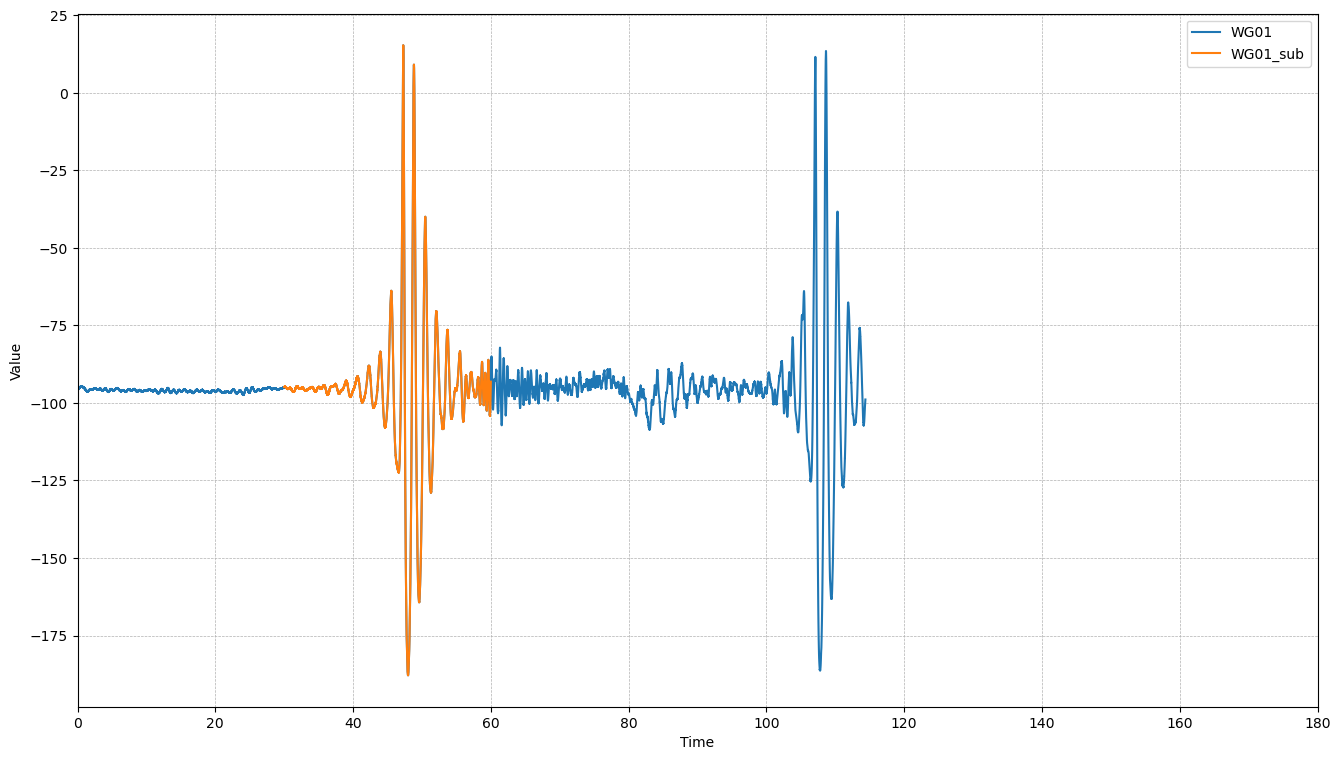

<xarray.Dataset> Size: 23MB
Dimensions:      (Time: 60000)
Coordinates:
  * Time         (Time) float64 480kB 30.0 30.0 30.0 30.0 ... 60.0 60.0 60.0
Data variables: (12/46)
    WG01         (Time) float64 480kB -94.86 -94.89 -94.89 ... -93.22 -93.14
    WG02         (Time) float64 480kB -96.12 -96.45 -96.75 ... -86.64 -86.73
    WG03         (Time) float64 480kB -96.19 -96.2 -96.22 ... -93.9 -93.83
    WG04         (Time) float64 480kB -98.08 -98.08 -98.1 ... -96.16 -96.03
    WG05         (Time) float64 480kB -98.7 -98.58 -98.55 ... -97.32 -97.16
    WG06         (Time) float64 480kB -269.9 -269.9 -269.9 ... -269.9 -269.9
    ...           ...
    Mo07         (Time) float64 480kB 156.3 156.3 156.3 ... 156.4 156.4 156.3
    Mo08         (Time) float64 480kB -738.8 -738.8 -738.8 ... -738.2 -738.2
    L1           (Time) float64 480kB -0.3707 -0.3844 ... -0.4118 -0.4118
    L2           (Time) float64 480kB -0.01457 -0.01457 ... -0.04371 -0.04371
    L3           (Time) float64 480kB 0.

In [ ]:
xmin = 0
xmax = 180

# Plot
plt.figure(figsize=(16,9))
plt.plot(ds['Time'], ds['WG01'], linestyle='-', label="WG01")
plt.xlabel("Time")
plt.ylabel("Value")
# plt.yticks(range(0,150,2))
plt.xlim(xmin, xmax)
# plt.ylim(ymin, ymax)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


## Analyse LED Signal

In [7]:
df_def = loaded_mat["DefaultData"]
df_raw = loaded_mat["MP3RawValue"]

skb.postprocess.updated_LED_transition_indices(df_def)
pprint(df_def.attrs)

skb.postprocess.updated_LED_transition_indices(df_raw)
pprint(df_raw.attrs)

{'LED_index_0_to_1': np.int64(10058),
 'LED_index_1_to_0': np.int64(22569),
 'LED_time_0_to_1': np.float64(5.08883),
 'LED_time_1_to_0': np.float64(11.3443),
 'reference': 'MP3Filtered'}
{'LED_index_0_to_1': np.int64(10058),
 'LED_index_1_to_0': np.int64(22569),
 'LED_time_0_to_1': np.float64(5.08883),
 'LED_time_1_to_0': np.float64(11.3443)}


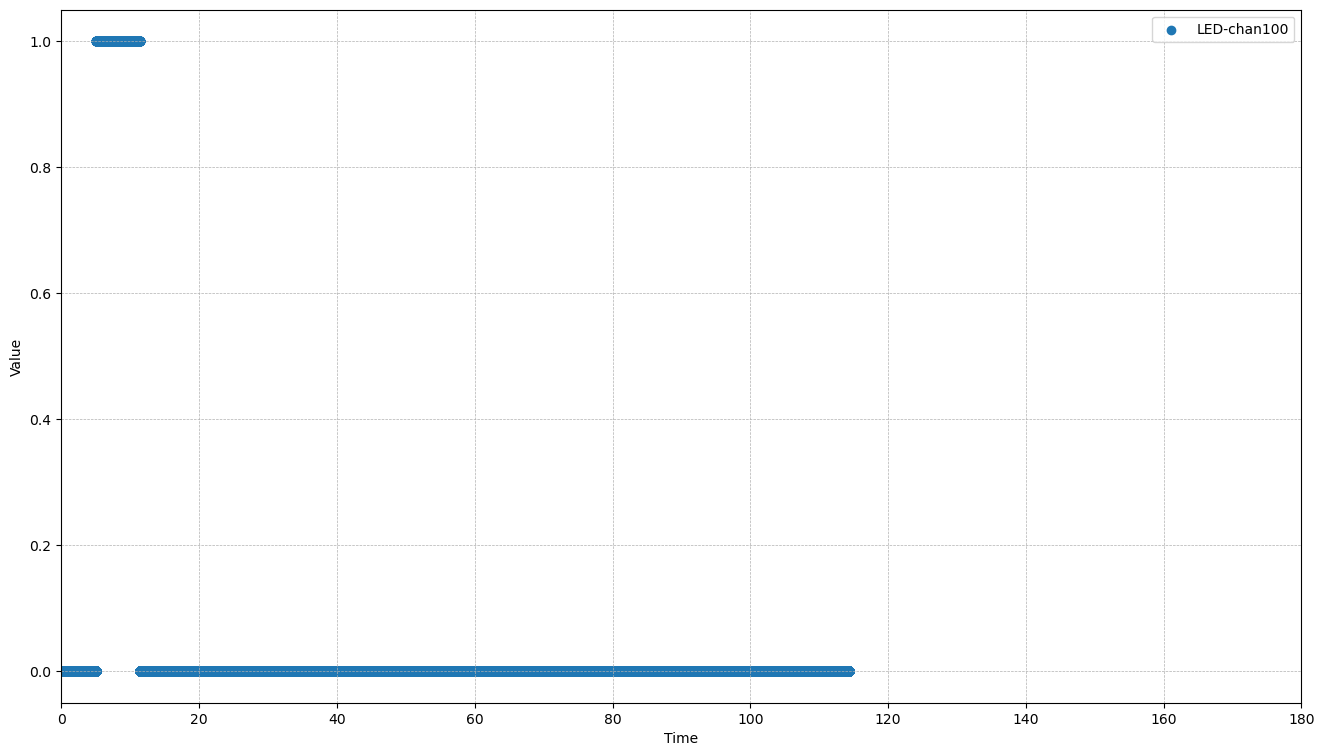

In [8]:
# Plot
plt.figure(figsize=(16,9))
plt.scatter(ds['Time'], ds['LED-chan100'], linestyle='-', label="LED-chan100")
plt.xlabel("Time")
plt.ylabel("Value")
# plt.yticks(range(0,150,2))
plt.xlim(xmin, xmax)
# plt.ylim(ymin, ymax)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()